# Setup: Only run once


In [8]:
import os

# move up from notebooks → project root
os.chdir(os.path.join(os.getcwd(), os.pardir))
print("Working dir is now:", os.getcwd())

from initialize import RAW_MAUS_DATA_PATH, PREPROCESSED_MAUS_DATA_PATH


Working dir is now: /Users/adrian/Documents/01_projects


In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing

In [10]:
# Generally: 
# python -m preprocessing \
#        --dataset_type maus_finger \
#        --raw_path   "/Users/adrian/Documents/01_projects/00_ppg_project/data/MAUS/raw/Raw_data" \                 # can be left empty to use the default path
#        --output_path "/Users/adrian/Documents/01_projects/00_ppg_project/data/MAUS/preprocessed" \                # can be left empty to use the default path
#        --post_filter

In [11]:
# MAUS: either maus_wrist, maus_finger, maus 
%run /Users/adrian/Documents/01_projects/02_clean_ppg/preprocessing/preprocessing.py --dataset_type maus_finger --post_filter
%run /Users/adrian/Documents/01_projects/02_clean_ppg/preprocessing/preprocessing.py --dataset_type maus_wrist --post_filter 

# AURORA: either aurora_osc, aurora_auc, aurora
%run /Users/adrian/Documents/01_projects/02_clean_ppg/preprocessing/preprocessing.py --dataset_type aurora --post_filter

# 1 minute 43 seconds approx

Raw stage is going to be performed (no --skip_raw)
Running datasets: ['maus_finger']

=== Processing maus_finger dataset ===
Processing maus_finger data.
Step 1: Load metadata and get waveform folder based on dataset type
[INFO] MAUS resting loader – 21 files found (finger)
Step 2: Create dictionary for each participant
Step 3: Process each subject's raw optical signal with pyPPG (initial derivatives)
Step 4: Split into individual waves, compute ensemble wave, average HR, and compute derivatives
Step 5: Save final dictionary
Final dictionary saved as /Users/adrian/Documents/01_projects/02_clean_ppg/data/MAUS/preprocessed/data_dict_maus_finger.pt

=== Post‑processing stage ===
Does not do anything right now any more. TODO: Remove this option.
Raw stage is going to be performed (no --skip_raw)
Running datasets: ['maus_wrist']

=== Processing maus_wrist dataset ===
Processing maus_wrist data.
Step 1: Load metadata and get waveform folder based on dataset type
[INFO] MAUS resting loader – 

In [12]:
import torch 

dd = torch.load("/Users/adrian/Documents/01_projects/02_clean_ppg/data/AURORA/preprocessed/data_dict_osc_auc_with_derivatives.pt", weights_only=False)
print("Number of subjects in AURORA data_dict:", len(dd))
dd.keys()

Number of subjects in AURORA data_dict: 686


dict_keys(['a000', 'a001', 'a002', 'a005', 'a007', 'a009', 'a011', 'a013', 'a014', 'a018', 'a019', 'a020', 'a021', 'a022', 'a027', 'a029', 'a032', 'a034', 'a035', 'a040', 'a041', 'a043', 'a044', 'a045', 'a047', 'a048', 'a049', 'a050', 'a051', 'a052', 'a053', 'a057', 'a058', 'a060', 'a064', 'a065', 'a067', 'a069', 'a070', 'a071', 'a073', 'a074', 'a075', 'a076', 'a078', 'a079', 'a080', 'a081', 'a084', 'a085', 'a086', 'a088', 'a092', 'a094', 'a096', 'a097', 'a099', 'a101', 'a108', 'a109', 'a110', 'a112', 'a113', 'a114', 'a116', 'a117', 'a119', 'a120', 'a121', 'a124', 'a125', 'a127', 'a128', 'a129', 'a131', 'a132', 'a133', 'a136', 'a137', 'a138', 'a139', 'a140', 'a141', 'a142', 'a143', 'a144', 'a148', 'a149', 'a151', 'a152', 'a153', 'a154', 'a156', 'a157', 'a158', 'a159', 'a160', 'a161', 'a163', 'a164', 'a165', 'a166', 'a167', 'a168', 'a170', 'a172', 'a173', 'a175', 'a176', 'a180', 'a181', 'a184', 'a187', 'a191', 'a192', 'a193', 'a196', 'a197', 'a198', 'a199', 'a201', 'a202', 'a203', 'a206

In [13]:
dd["a001"].keys()

dict_keys(['age', 'gender', 'high_bp', 'baseline_sbp', 'baseline_dbp', 'height', 'weight', 'cvd_meds', 'fitzpatrick_scale', 'pressure_quality', 'optical_quality', 'raw_optical', 'delta_t', 'sampling_rate', 'ppg', 'vpg', 'apg', 'jpg', 'fiducials_pyPPG', 'individual_waves', 'fid_on_ppg', 'wave_durations', 'average_hr', 'rise_times_norm', 'rise_times_ms', 'average_rise_time_norm', 'average_rise_time_ms', 'ensemble_wave', 'ensemble_ppg', 'ensemble_vpg', 'ensemble_apg', 'ensemble_jpg', 'individual_wave_derivs_ppg_arr', 'individual_wave_derivs_vpg_arr', 'individual_wave_derivs_apg_arr', 'individual_wave_derivs_jpg_arr', 'ensemble_ppg_avg', 'ensemble_vpg_avg', 'ensemble_apg_avg', 'ensemble_jpg_avg', 'oscillo_or_auscul', 'bmi', 'height_m', 'weight_kg'])

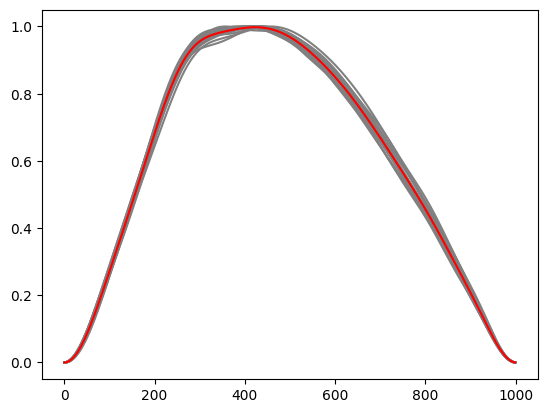

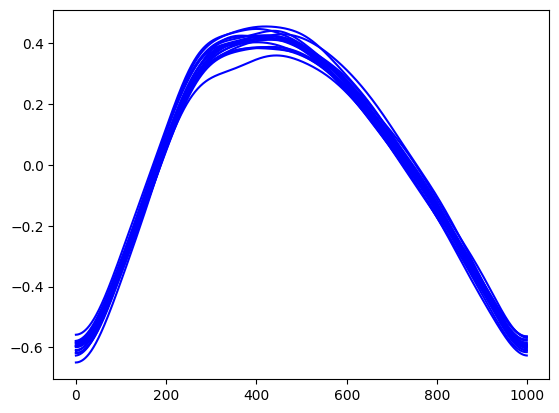

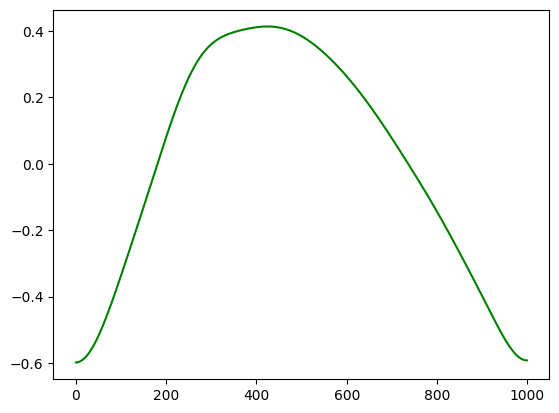

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(dd["a001"]["individual_waves"]).T, "gray")
plt.plot(np.array(dd["a001"]["ensemble_wave"]), "red")
plt.show()
plt.plot(np.array(dd["a001"]["individual_wave_derivs_ppg_arr"]).T, "blue")
plt.show()
plt.plot(np.array(dd["a001"]["ensemble_ppg_avg"]), "green")